<a href="https://www.kaggle.com/code/niltonpegass/yellow-taxi?scriptVersionId=241525730" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import warnings

import pandas as pd
import numpy as np

import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

df = pd.read_csv('/kaggle/input/new-york-city-taxi-trips-2017/2017_Yellow_Taxi_Trip_Data.csv')

In [2]:
def display_dataset_overview(df: pd.DataFrame) -> None:
    """
    Display general information about the dataset,
    including shape, variable descriptions, sample data, and summary statistics.
    """
    print(
        f">> Dataset shape: {df.shape[0]} rows and {df.shape[1]} columns "
        f"({df.shape[0] * df.shape[1]} data points)\n"
    )

    # Description of key dataset variables
    variable_descriptions = {
        'ab': "ab",
        'ab': "ab",
        'ab': "ab",
        'ab': "ab",
        'ab': "ab",
        'ab': "ab",
        'ab': "ab",
        'ab': "ab",
        'ab': "ab",
        'ab': "ab"
    }

    variable_df = (
        pd.DataFrame.from_dict(variable_descriptions, orient='index', columns=['Description'])
        .reset_index()
        .rename(columns={'index': 'Variable'})
    )
    display(variable_df)

    print(">> General dataset information:")
    display(df.info())

    print(">> First 5 rows:")
    display(df.head(5))

    print(">> Descriptive statistics:")
    display(df.describe())


# Run the overview on the processed dataset
display_dataset_overview(df)

>> Dataset shape: 22699 rows and 18 columns (408582 data points)



,Variable,Description
0,ab,ab


>> General dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount            

None

>> First 5 rows:


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,24870114,2,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56
1,35634249,1,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80
2,106203690,1,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75
3,38942136,2,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69
4,30841670,2,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80


>> Descriptive statistics:


,Unnamed: 0,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
mean,5.675849e+07,1.556236,1.642319,2.913313,1.043394,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,1.285231,3.653171,0.708391,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,1.000000,0.990000,1.000000,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,1.000000,1.610000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,2.000000,3.060000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,1.134863e+08,2.000000,6.000000,33.960000,99.000000,265.000000,265.000000,4.000000,999.990000,4.500000,0.500000,200.000000,19.100000,0.300000,1200.290000


In [3]:
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

df['month_num'] = df['tpep_pickup_datetime'].dt.strftime('%m')
df['month_nam'] = df['tpep_pickup_datetime'].dt.month_name().str[:3].str.lower()

df['day_num'] = df['tpep_pickup_datetime'].dt.strftime('%d')
df['day_nam'] = df['tpep_pickup_datetime'].dt.day_name().str[:3].str.lower()

display(df.head(10))

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,month_num,month_nam,day_num,day_nam
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,03,mar,25,sat
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,04,apr,11,tue
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,12,dec,15,fri
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,05,may,07,sun
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,04,apr,15,sat
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,1,9.0,0.5,0.5,2.06,0.0,0.3,12.36,03,mar,25,sat
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,1,47.5,1.0,0.5,9.86,0.0,0.3,59.16,05,may,03,wed
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,1,16.0,1.0,0.5,1.78,0.0,0.3,19.58,08,aug,15,tue
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,2,9.0,0.0,0.5,0.00,0.0,0.3,9.80,02,feb,04,sat
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,1,13.0,0.0,0.5,2.75,0.0,0.3,16.55,11,nov,10,fri


In [4]:
months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
days = ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']

display(df['passenger_count'].value_counts())

print()

rides_day = df['day_nam'].value_counts().reindex(index = days)
display(rides_day)

print()

df_group_sum_revenue_day = (df.groupby('day_nam')[['total_amount']]
            .sum()
            .round(2)
            .reindex(index = days))
display(df_group_sum_revenue_day)

print()

rides_month = df['month_nam'].value_counts().reindex(index = months)
display(rides_month)

df_group_mean_tips = (df.groupby(['passenger_count'])[['tip_amount', 'total_amount']]
            .mean()
            .sort_values(by = 'passenger_count', ascending = False)
            .round(2))
display(df_group_mean_tips)

print()

df_group_sum_revenue_month = (df.groupby('month_nam')[['total_amount']]
            .sum()
            .round(2)
            .reindex(index = months))
display(df_group_sum_revenue_month)

passenger_count
1    16117
2     3305
5     1143
3      953
6      693
4      455
0       33
Name: count, dtype: int64

day_nam
sun    2998
mon    2931
tue    3198
wed    3390
thu    3402
fri    3413
sat    3367
Name: count, dtype: int64

,total_amount
day_nam,
sun,48624.06
mon,49574.37
tue,52527.14
wed,55310.47
thu,57181.91
fri,55818.74
sat,51195.40


month_nam
jan    1997
feb    1769
mar    2049
apr    2019
may    2013
jun    1964
jul    1697
aug    1724
sep    1734
oct    2027
nov    1843
dec    1863
Name: count, dtype: int64

,tip_amount,total_amount
passenger_count,,
6,1.72,16.09
5,1.87,16.26
4,1.53,16.67
3,1.72,16.62
2,1.86,17.39
1,1.85,16.07
0,2.14,17.62


,total_amount
month_nam,
jan,31735.25
feb,28937.89
mar,33085.89
apr,32012.54
may,33828.58
jun,32920.52
jul,26617.64
aug,27759.56
sep,28206.38


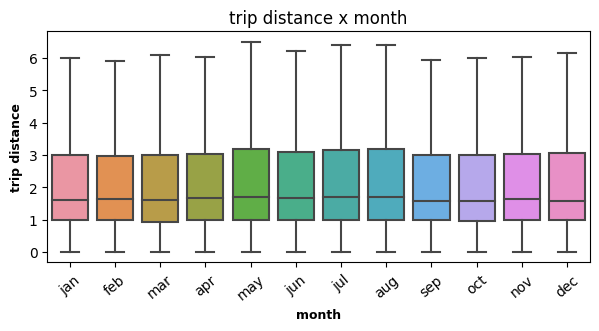

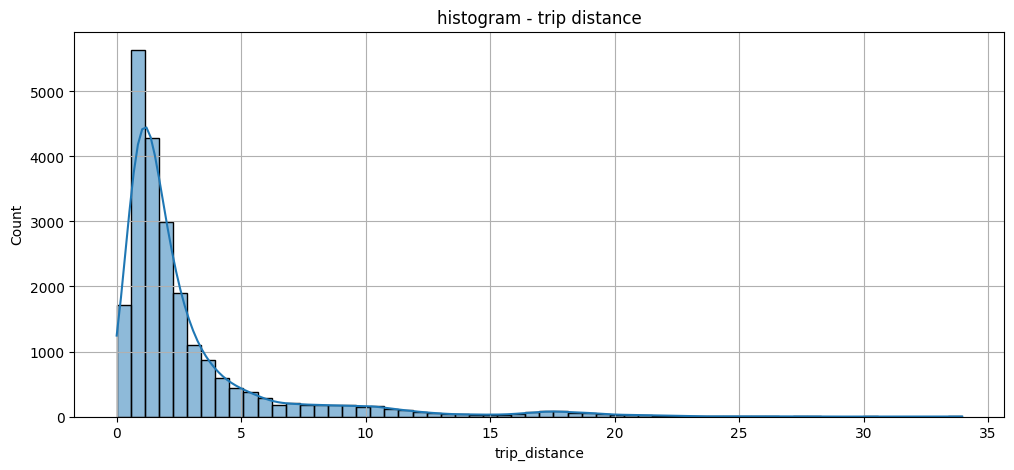

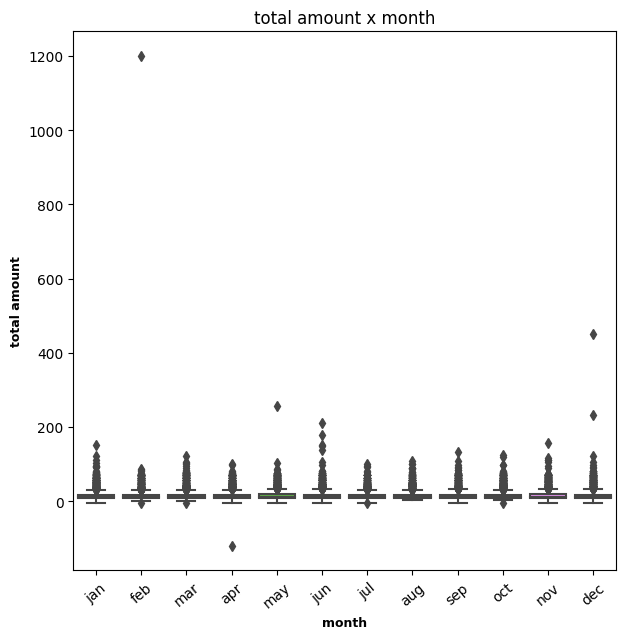

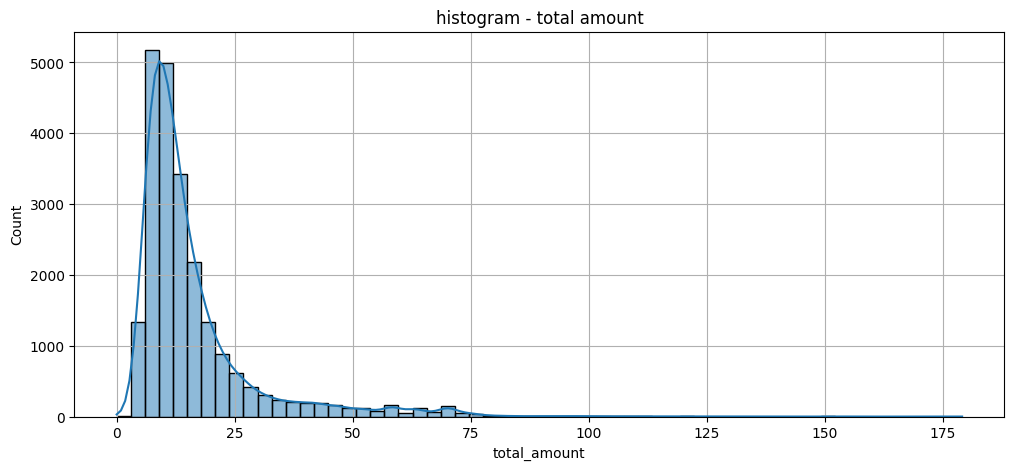

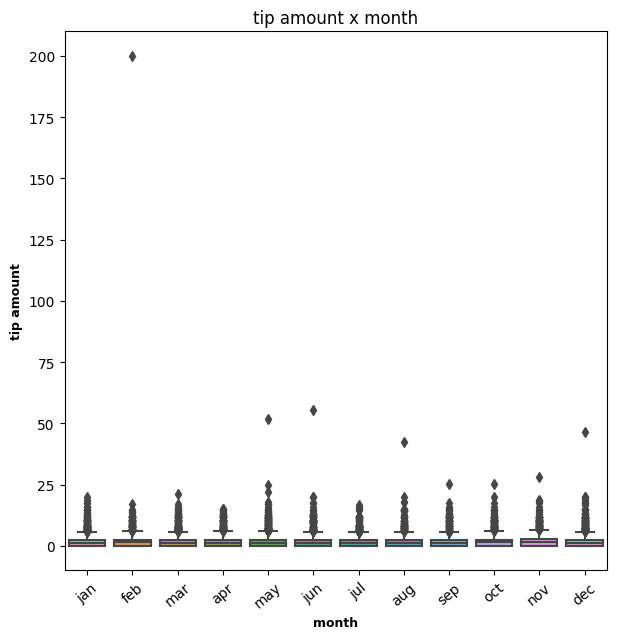

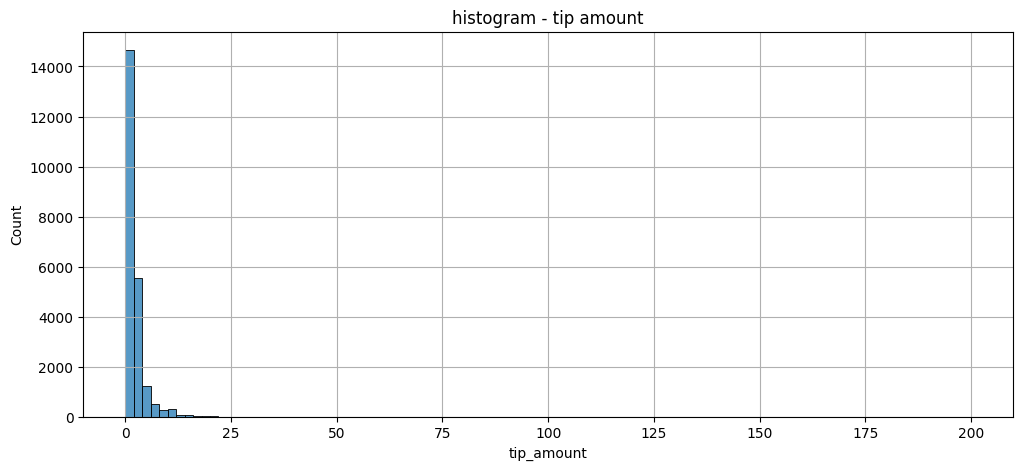

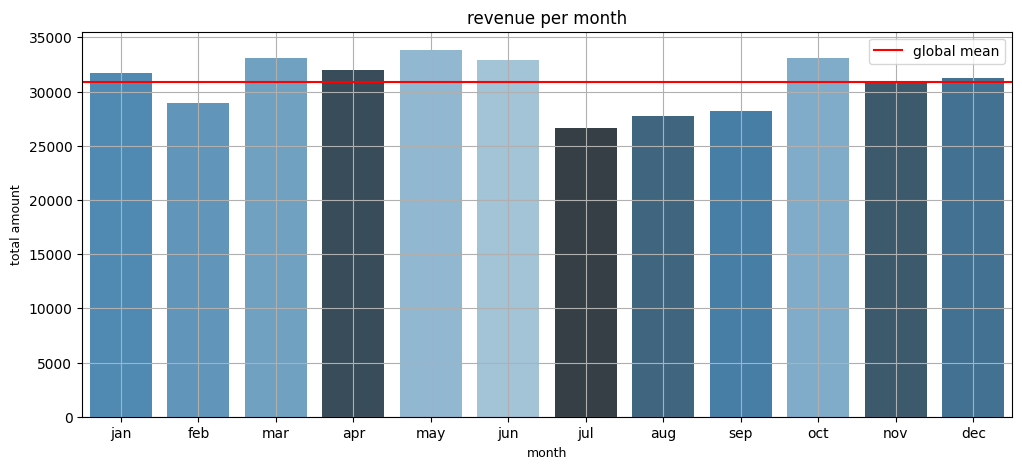

In [5]:
plt.figure(figsize = (7, 3))

sns.boxplot(x = df['month_nam'],
            y = df['trip_distance'],
            order = months,
            showfliers = False);

plt.xlabel('month', fontsize = 9, weight = 'bold')
plt.ylabel('trip distance', fontsize = 9, weight = 'bold')
plt.title('trip distance x month', fontsize = 12)
plt.xticks(rotation = 40)

plt.show()

# mask_trip_distance = (df['trip_distance'] <= 4)
# df_mask_trip_distance = df[mask_trip_distance]

plt.figure(figsize = (12, 5))
sns.histplot(data = df,
             x = 'trip_distance',
             bins = 60,
             kde = True)

plt.title('histogram - trip distance', fontsize = 12)
plt.grid(True)

plt.figure(figsize = (7, 7))
sns.boxplot(x = df['month_nam'],
            y = df['total_amount'],
            order = months,
            showfliers = True);

plt.xlabel('month', fontsize = 9, weight = 'bold')
plt.ylabel('total amount', fontsize = 9, weight = 'bold')
plt.title('total amount x month', fontsize = 12)
plt.xticks(rotation = 40)

plt.show()

mask_total_amount = ((df['total_amount'] <= 200) & (df['total_amount'] >= 0))
df_mask_total_amount = df[mask_total_amount]

plt.figure(figsize = (12, 5))
sns.histplot(data = df_mask_total_amount,
             x = 'total_amount',
             bins = 60,
             kde = True)

plt.title('histogram - total amount', fontsize = 12)
plt.grid(True)

plt.figure(figsize = (7, 7))
sns.boxplot(x = df['month_nam'],
            y = df['tip_amount'],
            order = months,
            showfliers = True)

plt.xlabel('month', fontsize = 9, weight = 'bold')
plt.ylabel('tip amount', fontsize = 9, weight = 'bold')
plt.title('tip amount x month', fontsize = 12)
plt.xticks(rotation = 40)

plt.show()

plt.figure(figsize = (12, 5))
sns.histplot(data = df,
             x = 'tip_amount',
             bins = 100,
             kde = False)

plt.title('histogram - tip amount', fontsize = 12)
plt.grid(True)

plt.figure(figsize = (12, 5))
data = df_group_sum_revenue_month.head(12)
pal = sns.color_palette("Blues_d", len(data))
rank = data['total_amount'].argsort()
ax = sns.barplot(x = data.index,
                 y = data['total_amount'],
                 palette = np.array(pal[::-1])[rank])
ax.axhline(df_group_sum_revenue_month['total_amount'].mean(), ls = '-', color = 'red', label = 'global mean')
ax.legend()
plt.title('revenue per month', fontsize = 12)
plt.xlabel('month', fontsize = 9)
plt.ylabel('total amount', fontsize = 9)
plt.grid(True)

,trip_distance
DOLocationID,
207,1.200000
193,1.390556
237,1.555494
234,1.727806
137,1.818852
...,...
51,17.310000
11,17.945000
210,20.500000


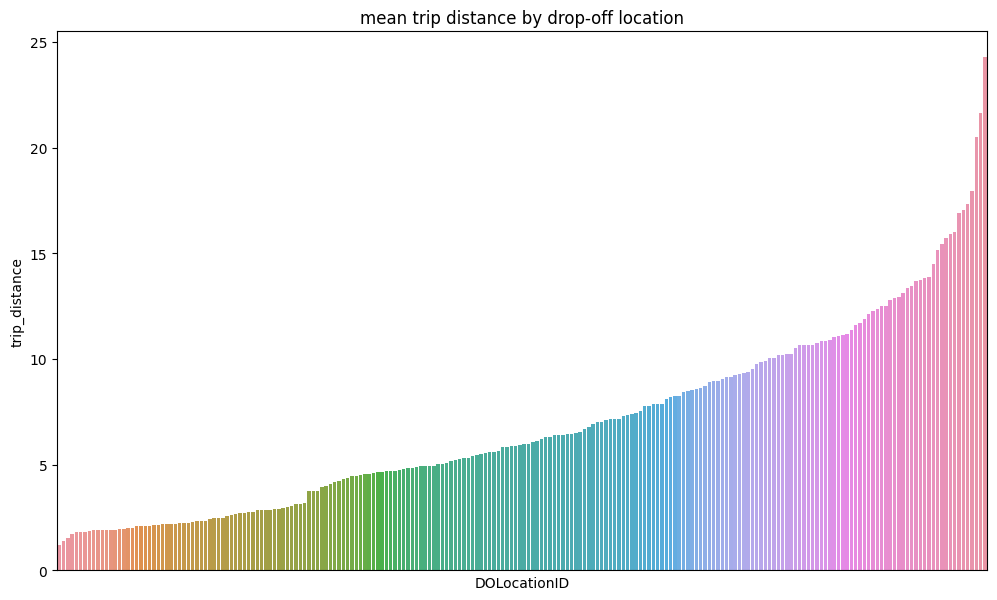

In [6]:
dropoff_mean = df.groupby('DOLocationID')[['trip_distance']].mean()
dropoff_mean = dropoff_mean.sort_values(by = 'trip_distance', ascending = True)
display(dropoff_mean)

plt.figure(figsize = (12, 7))
ax = sns.barplot(x = dropoff_mean.index,
            y = dropoff_mean['trip_distance'],
            order = dropoff_mean.index)
ax.set_xticklabels([])
ax.set_xticks([])
plt.title('mean trip distance by drop-off location', fontsize = 12)
plt.show()

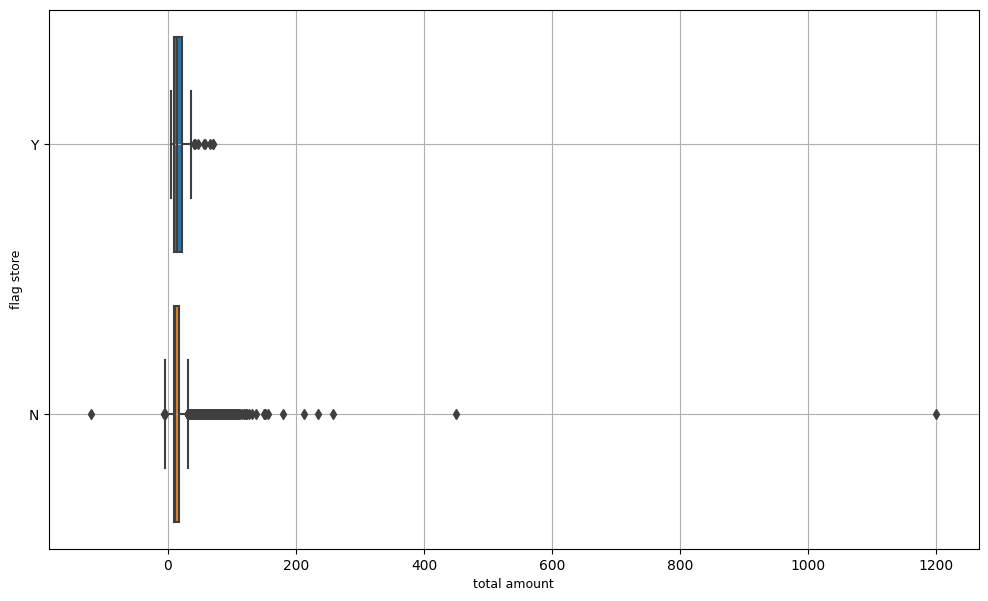

In [7]:
flag_order = ['Y', 'N']

df_sorted_total_amount = df
df_sorted_total_amount['total_amount'] = df_sorted_total_amount['total_amount'].sort_values(ascending = True)
df_sorted_total_amount

plt.figure(figsize = (12, 7))
ax = sns.boxplot(x = df_sorted_total_amount['total_amount'],
                 y = df_sorted_total_amount['store_and_fwd_flag'],
                 order = flag_order)

#ax.set_xticklabels(df_sorted_total_amount['total_amount'], fontsize = 16)
#ax.set_yticklabels(df_sorted_total_amount['store_and_fwd_flag'], fontsize = 16)
plt.xlabel('total amount', fontsize = 9)
plt.ylabel('flag store', fontsize = 9)

plt.grid()

In [8]:
df['trip_duration'] = ((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60).round(2) #trip_duration [min]
df[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_duration', 'total_amount', 'month_nam', 'day_nam']]

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_duration,total_amount,month_nam,day_nam
0,2017-03-25 08:55:43,2017-03-25 09:09:47,14.07,16.56,mar,sat
1,2017-04-11 14:53:28,2017-04-11 15:19:58,26.50,20.80,apr,tue
2,2017-12-15 07:26:56,2017-12-15 07:34:08,7.20,8.75,dec,fri
3,2017-05-07 13:17:59,2017-05-07 13:48:14,30.25,27.69,may,sun
4,2017-04-15 23:32:20,2017-04-15 23:49:03,16.72,17.80,apr,sat
...,...,...,...,...,...,...
22694,2017-02-24 17:37:23,2017-02-24 17:40:39,3.27,5.80,feb,fri
22695,2017-08-06 16:43:59,2017-08-06 17:24:47,40.80,73.20,aug,sun
22696,2017-09-04 14:54:14,2017-09-04 14:58:22,4.13,5.30,sep,mon
22697,2017-07-15 12:56:30,2017-07-15 13:08:26,11.93,13.00,jul,sat


***Pro tip:*** Put yourself in your client's perspective, what would they want to know? 

My client would likely want to know: if the type of outliers come from the way that this data was set up on the datasource, if it was sent with the flag Y or N, which can be a source of data inconsistency.

## A/B Test

***down:*** You are interested in the relationship between payment type and the fare amount the customer pays. One approach is to look at the average fare amount for each payment type. 

In [9]:
df_credit = df[df['payment_type'] == 1]
df_cash = df[df['payment_type'] == 2]

mean_credit = df_credit['fare_amount'].mean()
mean_cash = df_cash['fare_amount'].mean()

std_credit = df_credit['fare_amount'].std()
std_cash = df_cash['fare_amount'].std()

print(f'mean fare amount [credit]: {mean_credit:.2f} // mean fare amount [cash]: {mean_cash:.2f}')
print(f'std fare amount [credit]: {std_credit:.2f} // std fare amount [cash]: {std_cash:.2f}')

mean fare amount [credit]: 13.43 // mean fare amount [cash]: 12.21
std fare amount [credit]: 13.85 // std fare amount [cash]: 11.69


Based on the averages shown, it appears that customers who pay in credit card tend to pay a larger fare amount than customers who pay in cash. However, this difference might arise from random sampling, rather than being a true difference in fare amount. To assess whether the difference is statistically significant, we will conduct a hypothesis test.

#### Task 3. Hypothesis testing

Before you conduct the hypothesis test, consider the following questions where applicable to complete:

Recall the difference between the null hypothesis and the alternative hypotheses. Consider the hypotheses for this project as listed below.

$H_0$: There is no difference in the average fare amount between customers who use credit cards and customers who use cash.

$H_A$: There is a difference in the average fare amount between customers who use credit cards and customers who use cash.

In [10]:
statistic, pvalue = stats.ttest_ind(a = df_credit['fare_amount'],
                                    b = df_cash['fare_amount'],
                                    equal_var = False)
print(f'statistic: {statistic:.2f} // pvalue: {pvalue * 100:.2f}%')

statistic: 6.87 // pvalue: 0.00%


The pvalue is significantly smaller than the significance level, then we reject the null hypothesis. Our analysis shows us that there is a significant difference for each payment type. Even if we had chosen 1% for the significance level, the analysis gives support to the rejection of the null hypothesis.

In [11]:
numeric_columns_df = df.select_dtypes(include = ['number'])

for num in numeric_columns_df:
    quartile_1st = df[num].quantile(0.25)
    quartile_3rd = df[num].quantile(0.75)
    iqr = quartile_3rd - quartile_1st
    
    upper_limit = quartile_3rd + 1.5 * iqr
    lower_limit = quartile_1st - 1.5 * iqr
    
    df_outliers = df[(df[num] >= upper_limit) | (df[num] <= lower_limit)]
    
    total_outliers = df_outliers.shape[0]
    total_dataset = df.shape[0]
    percentage_outliers = total_outliers / total_dataset
    
    total_dataset

    if (percentage_outliers != 0 and percentage_outliers != 1):
        print(f'[ {num} ] >> {total_outliers} outliers ::: {percentage_outliers * 100:.2f}%')

[ passenger_count ] >> 2291 outliers ::: 10.09%
[ trip_distance ] >> 2527 outliers ::: 11.13%
[ payment_type ] >> 46 outliers ::: 0.20%
[ fare_amount ] >> 2145 outliers ::: 9.45%
[ extra ] >> 103 outliers ::: 0.45%
[ tip_amount ] >> 1186 outliers ::: 5.22%
[ total_amount ] >> 2161 outliers ::: 9.52%
[ trip_duration ] >> 1228 outliers ::: 5.41%


In [12]:
# ## transformar valores negativos em zero
df.loc[df['fare_amount'] < 0, 'fare_amount'] = 0

